In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import boxcox

In [130]:
df1 = pd.read_csv("bayut.csv")
df2 = pd.read_csv("opensooq.csv")

In [131]:
df1.columns

Index(['Unnamed: 0', 'Title', 'Location', 'Price', 'Size', 'Listing_Type'], dtype='object')

In [132]:
df1.drop('Unnamed: 0',axis=1, inplace=True)

In [133]:
df2.columns

Index(['Unnamed: 0', 'Title', 'Location', 'Price', 'Size', 'Listing_Type'], dtype='object')

In [134]:
df2.drop('Unnamed: 0',axis=1, inplace=True)

In [135]:
df = pd.concat([df1, df2], ignore_index=True)
df.to_csv("before_cleaning.csv")

In [136]:
df

,Title,Location,Price,Size,Listing_Type
0,"1 Bedroom Apartment For Rent Al Hail, Muscat","Al Hail, Muscat",OMR300,100 Sq. M.,For Rent
1,"2 Bedroom Apartment For Rent in Ruwi, Muscat","Ruwi, Muscat",OMR200,89 Sq. M.,For Rent
2,"1 Bedroom Apartment For Rent in Ruwi, Muscat","Ruwi, Muscat",OMR150,68 Sq. M.,For Rent
3,"2 Bedroom Chalet For Rent in Barka, Al Batinah","Barka, Al Batinah",OMR50,"3,000 Sq. M.",For Rent
4,"1 Bedroom Apartment For Rent in Muscat Hills, ...","Muscat Hills, Muscat",OMR499,88 Sq. M.,For Rent
...,...,...,...,...,...
6762,Furnished Daily in Muscat Amerat,"Muscat, Amerat",10 OMR,Furnished Daily in Muscat Amerat,For Rent
6763,Semi Furnished Monthly in Muscat Al Khoud,"Muscat, Al Khoud",100 OMR,Semi Furnished Monthly in Muscat Al Khoud,For Rent
6764,85 m2 1 Bedroom Apartments for Rent in Muscat ...,"Muscat, Al Khoud",195 OMR,85 m2 1 Bedroom Apartments for Rent in Muscat ...,For Rent
6765,120 m2 1 Bedroom Apartments for Rent in Muscat...,"Muscat, Seeb",100 OMR,120 m2 1 Bedroom Apartments for Rent in Muscat...,For Rent


In [137]:
df.shape

(6767, 5)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6767 entries, 0 to 6766
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         6767 non-null   object
 1   Location      6767 non-null   object
 2   Price         6652 non-null   object
 3   Size          6767 non-null   object
 4   Listing_Type  6767 non-null   object
dtypes: object(5)
memory usage: 264.5+ KB


In [139]:
df.isnull().sum()

Title             0
Location          0
Price           115
Size              0
Listing_Type      0
dtype: int64

In [140]:
df.duplicated().sum()

np.int64(1459)

In [141]:
df.drop_duplicates(keep='first', inplace=True)

In [142]:
df.Location.unique()

array(['Al Hail, Muscat', 'Ruwi, Muscat', 'Barka, Al Batinah',
       'Muscat Hills, Muscat', 'Qurum, Muscat',
       'The Wave (Almouj), Muscat', 'Bosher, Muscat',
       'Al Mawaleh, Muscat', 'Al Ghubrah, Muscat',
       'Madinat As Sultan Qaboos, Muscat', 'Al Hamriyah, Muscat',
       'Al Wadi Al Kabir, Muscat', 'Azaiba, Muscat', 'Al Khuwair, Muscat',
       'Al Seeb, Muscat', 'Salalah, Dhofar', 'Misfah, Muscat',
       'Al Amarat, Muscat', 'Bidiya, Al Sharqiya', 'Qantab, Muscat',
       'Darsait, Muscat', 'Saham, Al Batinah', 'Al Maabilah, Muscat',
       'Taqah, Dhofar', 'Barr Al Jissah, Muscat', 'Al Khoud, Muscat',
       'Al Qabil, Al Sharqiya', 'Shinas, Al Batinah',
       "Al Masn'a, Al Batinah", 'Muscat - Other, Muscat', 'Ansab, Muscat',
       'Al Sifah, Muscat', 'Ghala, Muscat', 'Qurayyat, Muscat',
       'Sumail, Al Dakhiliya', 'Sohar, Al Batinah', 'Sur, Al Sharqiya',
       'Ibra, Al Sharqiya', 'Al Mudaibi, Al Sharqiya',
       'Mahdhah, Al Buraimi', 'Al Duqum, Al Wusta',

In [143]:
df["Price"].unique()

array(['OMR300', 'OMR200', 'OMR150', 'OMR50', 'OMR499', 'OMR650',
       'OMR850', 'OMR500', 'OMR250', 'OMR495', 'OMR750', 'OMR950',
       'OMR230', 'OMR450', 'OMR800', 'OMR1,000', 'OMR700', 'OMR1,800',
       'OMR2,600', 'OMR3,500', 'OMR180', 'OMR1,400', 'OMR1,150', 'OMR395',
       'OMR1,500', 'OMR360', 'OMR270', 'OMR1,300', 'OMR550', 'OMR630',
       'OMR225', 'OMR1,250', 'OMR900', 'OMR440', 'OMR380', 'OMR625',
       'OMR190', 'OMR599', 'OMR600', 'OMR400', 'OMR1,200', 'OMR350',
       'OMR2,500', 'OMR130', 'OMR275', 'OMR220', 'OMR1,900', 'OMR325',
       'OMR1,350', 'OMR320', 'OMR420', 'OMR1,899', 'OMR390', 'OMR725',
       'OMR755', 'OMR210', 'OMR1,750', 'OMR330', 'OMR90', 'OMR60',
       'OMR799', 'OMR1,199', 'OMR1,700', 'OMR430', 'OMR160', 'OMR65',
       'OMR120', 'OMR1,100', 'OMR140', 'OMR280', 'OMR110', 'OMR175',
       'OMR100', 'OMR1,749', 'OMR6,000', 'OMR1,299', 'OMR2,100', 'OMR343',
       'OMR240', 'OMR70', 'OMR525', 'OMR675', 'OMR185', 'OMR1,600',
       'OMR340', 'OMR

In [144]:
df['Price']=df['Price'].str.replace(r'\W+','', regex=True)
df['Price']=df['Price'].str.replace(r'\D+', '', regex=True)
df['Price'].fillna(df['Price'].mode()[0], inplace=True)
df['Price']=df['Price'].str.split().str[0].astype(float)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_21520\4115037658.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mode()[0], inplace=True)


In [145]:
df["Price"].unique()

array([3.00000e+02, 2.00000e+02, 1.50000e+02, 5.00000e+01, 4.99000e+02,
       6.50000e+02, 8.50000e+02, 5.00000e+02, 2.50000e+02, 4.95000e+02,
       7.50000e+02, 9.50000e+02, 2.30000e+02, 4.50000e+02, 8.00000e+02,
       1.00000e+03, 7.00000e+02, 1.80000e+03, 2.60000e+03, 3.50000e+03,
       1.80000e+02, 1.40000e+03, 1.15000e+03, 3.95000e+02, 1.50000e+03,
       3.60000e+02, 2.70000e+02, 1.30000e+03, 5.50000e+02, 6.30000e+02,
       2.25000e+02, 1.25000e+03, 9.00000e+02, 4.40000e+02, 3.80000e+02,
       6.25000e+02, 1.90000e+02, 5.99000e+02, 6.00000e+02, 4.00000e+02,
       1.20000e+03, 3.50000e+02, 2.50000e+03, 1.30000e+02, 2.75000e+02,
       2.20000e+02, 1.90000e+03, 3.25000e+02, 1.35000e+03, 3.20000e+02,
       4.20000e+02, 1.89900e+03, 3.90000e+02, 7.25000e+02, 7.55000e+02,
       2.10000e+02, 1.75000e+03, 3.30000e+02, 9.00000e+01, 6.00000e+01,
       7.99000e+02, 1.19900e+03, 1.70000e+03, 4.30000e+02, 1.60000e+02,
       6.50000e+01, 1.20000e+02, 1.10000e+03, 1.40000e+02, 2.800

In [146]:
df.isnull().sum()

Title           0
Location        0
Price           0
Size            0
Listing_Type    0
dtype: int64

In [147]:
df['Size'].unique()

array(['100 Sq. M.', '89 Sq. M.', '68 Sq. M.', ...,
       '3-BEDROOM TOWNHOUSE [WA-155]',
       'Exquisite 3-Bedroom Luxury Villa in the Heart of Al Mouj, Muscat For rent',
       'Luxury furnished apartment for rent - primer Location with premium amenities'],
      shape=(3166,), dtype=object)

In [148]:
size_strict = df['Size'].str.extract(r'\b(\d[\d,]*(?:\.\d+)?)\b')[0]
size_cleaned = size_strict.str.replace(',', '', regex=False)
df['Size'] = pd.to_numeric(size_cleaned, errors='coerce')

In [149]:
df.isnull().sum()

Title              0
Location           0
Price              0
Size            1297
Listing_Type       0
dtype: int64

In [150]:
df.Size.fillna(df.Size.mode()[0], inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_21520\1096586506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Size.fillna(df.Size.mode()[0], inplace=True)


In [151]:
df.isnull().sum()

Title           0
Location        0
Price           0
Size            0
Listing_Type    0
dtype: int64

In [152]:
# df['Governorate'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

In [153]:
governorates = [
    'Muscat', 'Al Batinah', 'Dhofar', 'Al Sharqiya',
    'Al Dakhiliya', 'Al Buraimi', 'Al Wusta', 'Al Dhahirah'
]

def extract_governorate(location):
    for gov in governorates:
        if gov.lower() in location.lower():
            return gov
    return "Other"

df['Governorate'] = df['Location'].apply(extract_governorate)


In [154]:
df["Governorate"].unique()

array(['Muscat', 'Al Batinah', 'Dhofar', 'Al Sharqiya', 'Al Dakhiliya',
       'Al Buraimi', 'Al Wusta', 'Al Dhahirah', 'Other'], dtype=object)

In [155]:
df[df["Governorate"]=="Other"]=df[df["Governorate"]=="Other"].replace("Other","Buraimi")

In [156]:
df['price_per_sqm'] = df['Price'] / df['Size']

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5308 entries, 0 to 6756
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          5308 non-null   object 
 1   Location       5308 non-null   object 
 2   Price          5308 non-null   float64
 3   Size           5308 non-null   float64
 4   Listing_Type   5308 non-null   object 
 5   Governorate    5308 non-null   object 
 6   price_per_sqm  5308 non-null   float64
dtypes: float64(3), object(4)
memory usage: 331.8+ KB


<Axes: >

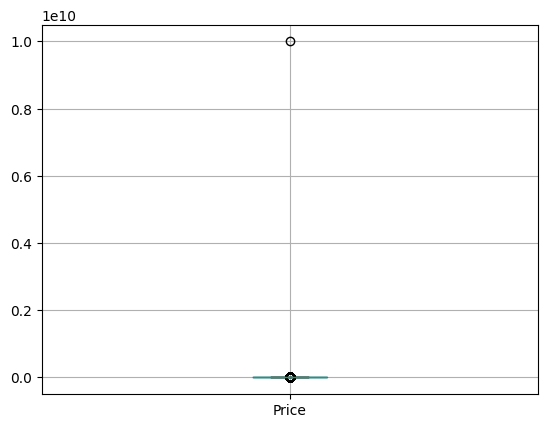

In [158]:
df.boxplot("Price")

In [159]:
def iqr_outlier(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return LL,UL

In [160]:
l,u= iqr_outlier("Price")
print(l,u)

-472.5 907.5


In [161]:
df = df[df['Price'].between(l,u)]

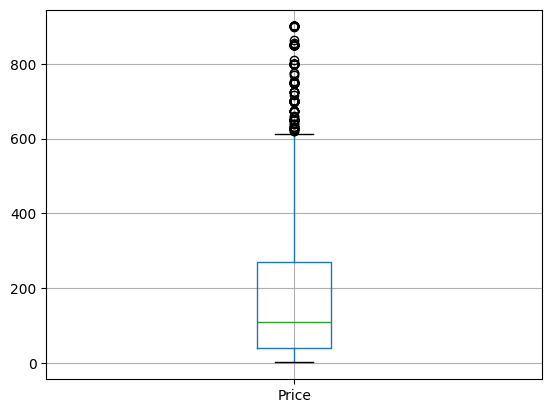

In [162]:
df.boxplot('Price')
plt.show()

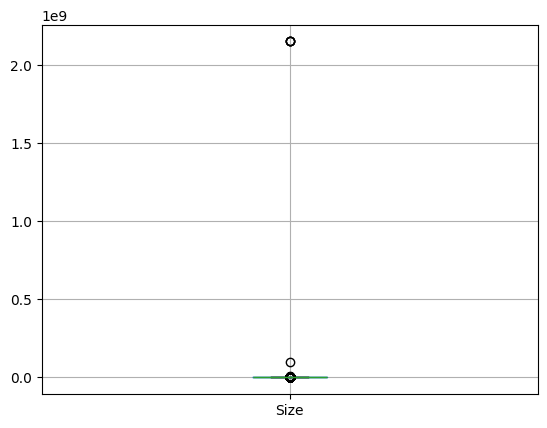

In [163]:
df.boxplot('Size')
plt.show()

In [164]:
l,u= iqr_outlier("Size")
print(l,u)

-75.0 365.0


In [165]:
df = df[df['Size'].between(l,u)]

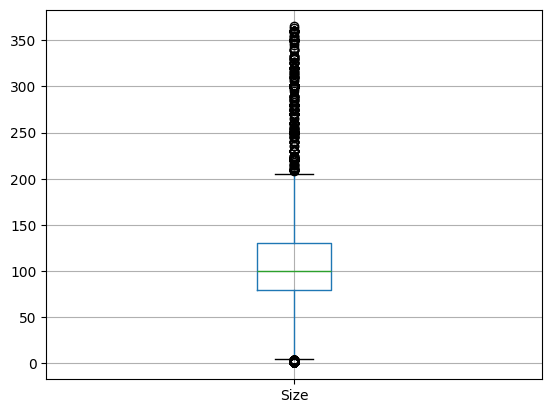

In [166]:
df.boxplot('Size')
plt.show()

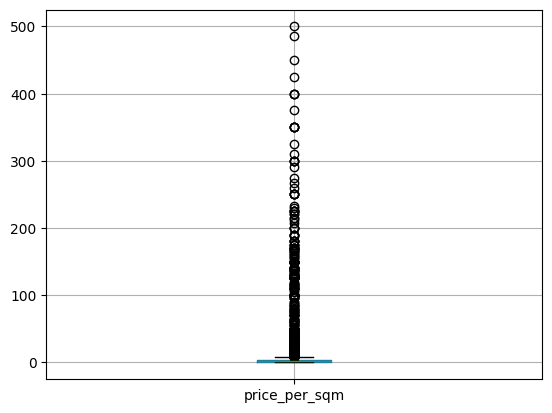

In [167]:
df.boxplot('price_per_sqm')
plt.show()

In [168]:
l,u= iqr_outlier("price_per_sqm")
print(l,u)

-4.25 8.15


In [169]:
df = df[df['price_per_sqm'].between(l,u)]

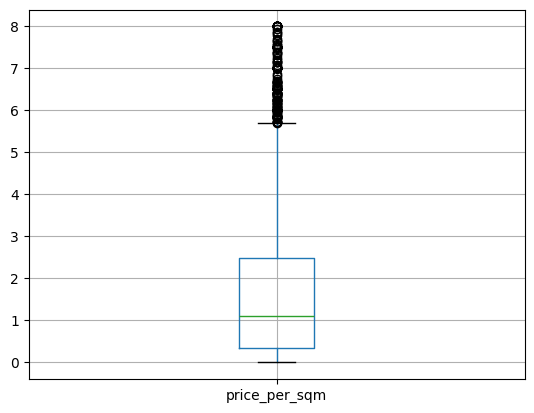

In [170]:
df.boxplot('price_per_sqm')
plt.show()

In [171]:
l = LabelEncoder()

In [172]:
categorical_columns = df.select_dtypes(include = 'object').columns

In [173]:
categorical_columns

Index(['Title', 'Location', 'Listing_Type', 'Governorate'], dtype='object')

In [174]:
for i in categorical_columns:
     df[i] = l.fit_transform(df[i])

In [175]:
df.head()

,Title,Location,Price,Size,Listing_Type,Governorate,price_per_sqm
0,13,27,300.0,100.0,0,7,3.000000
1,526,110,200.0,89.0,0,7,2.247191
2,66,110,150.0,68.0,0,7,2.205882
4,63,74,499.0,88.0,0,7,5.670455
5,1265,109,650.0,300.0,0,7,2.166667


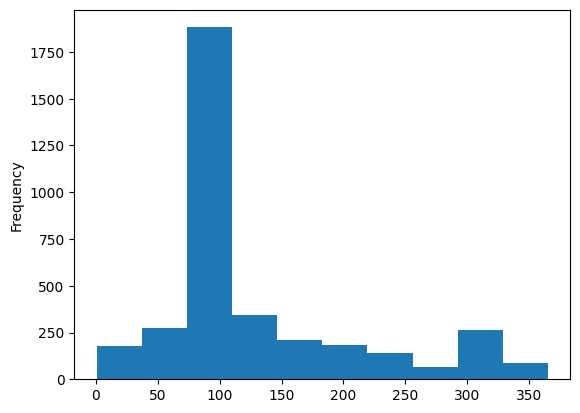

In [176]:
df['Size'].plot (kind='hist')
plt.show()

In [177]:
df['Size_boxcox'], fitted_lambda = boxcox(df['Size'])

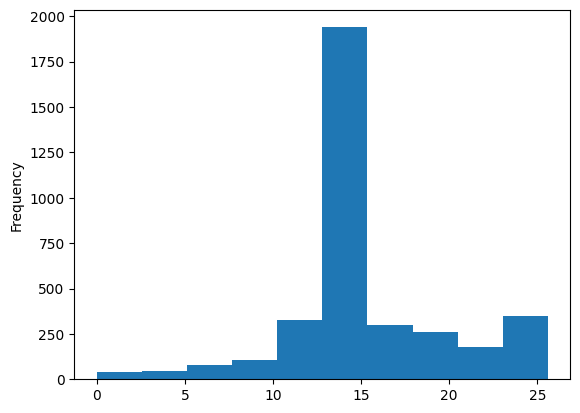

In [179]:
df['Size_boxcox'].plot (kind='hist')
plt.show()

In [180]:
df.columns

Index(['Title', 'Location', 'Price', 'Size', 'Listing_Type', 'Governorate',
       'price_per_sqm', 'Size_boxcox'],
      dtype='object')

In [181]:
scaling_columns = ['Price', 'Size', 'price_per_sqm']

In [182]:
scaler = StandardScaler()
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

In [185]:
df.to_csv("after_cleaning.csv")

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y) from the DataFrame
X = df.drop('Price', axis=1)
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Decision Tree Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Decision Tree Regression Results ---
Mean Squared Error (MSE): 0.01
R-squared (R2): 0.99
